In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [9]:
data = pd.read_csv('./102multRegr.csv')
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


the choice of the third variable in the regression equation ruined the model (i.e. affected the intercept and predictor coefficient as well as the R value) since it was not significant predictor. thus, whenever there is an insignificant variable, you should not use this model altogether. That means in academics, if you want to report the true R value, you must redo the regression excluding the insignificant vars. because the bias of this variable is reflected into the coefficients of the other variables.

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


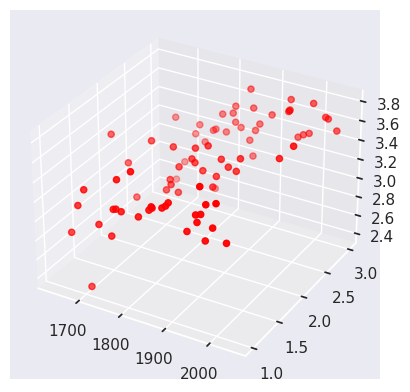

In [60]:
print(type(data[['GPA']]))
print(type(data['GPA']))
# create an object
lm = LinearRegression()
# define predictor and response variables
X, y = data[['SAT', 'Rand 1,2,3']], data.GPA
fittedLm = lm.fit(X, y)
ax = plt.axes(projection ="3d")
ax.scatter3D(data[['SAT']], data[['Rand 1,2,3']], data[['GPA']], color = 'red')
#ax.plot(data[['GPA']], data[['SAT']], data[['Rand 1,2,3']], lmmodel.predict(data[['SAT', 'Rand 1,2,3']]), color = 'blue')

In [66]:
#display regression coefficients and R-squared value of model
print(lm.intercept_, lm.coef_, lm.score(X, y))

stats_x = sm.add_constant(X)
mod = sm.OLS(y,stats_x)
fii = mod.fit()
fii.summary()


0.29603261264909486 [ 0.00165354 -0.00826982] 0.4066811952814283


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Fri, 12 May 2023   Prob (F-statistic):           6.58e-10
Time:                        10:55:46   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""